In [2]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [3]:
df = pd.read_csv('housing_sale_cleaned.csv')

In [4]:
df.head()
df.dtypes

house_price         int64
house_location     object
no_bedrooms         int64
no_washrooms        int64
house_type         object
date_renewed       object
total_views         int64
house_town_name    object
house_area_name    object
dtype: object

In [8]:
df1 = df
df1 = df1[df1.house_price<=1000000]
df1 = df1[df1.no_bedrooms<=7]
df1 = df1[df1.no_washrooms<=7]

for i, rows in df1.iterrows():
#     rows.house_price = rows.house_price.replace(",","")
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'][1:]

In [9]:
for i, rows in df1.iterrows():
#     rows.house_price = rows.house_price.replace(",","")
    df1.at[i,'house_area_name'] = df1.at[i,'house_area_name'][1:]

In [10]:
df1["house_area_name"] = df1["house_area_name"].str.replace("Dublin 6w","Dublin 6")

In [11]:
df1_encoded = df1.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_make = LabelEncoder()

df1_encoded['area_code'] = label_make.fit_transform(df1['house_area_name'])
df1_encoded['town_code'] = label_make.fit_transform(df1['house_town_name'])
df1_encoded['house_type_code'] = label_make.fit_transform(df1['house_type'])

df1_encoded_test = df1_encoded.drop(columns= ['total_views','house_location','date_renewed','house_town_name','house_area_name','house_type'])
df1_encoded_test.head()




house_price  no_bedrooms  no_washrooms  area_code  town_code  \
0       750000            4             3         19        204   
1       650000            4             2          4        205   
2       750000            4             1          6        172   
3       595000            4             3          0        129   
4       315000            3             3          0        127   

   house_type_code  
0                0  
1                6  
2                2  
3                2  
4                2

In [14]:
prices = df1_encoded_test['house_price']
features = df1_encoded_test.drop('house_price',axis = 1)

In [16]:
#prepare dataset  
#....   
#spilt dataset
Xtrn, Xtest, Ytrn, Ytest = train_test_split(features, prices, test_size=0.2)

c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


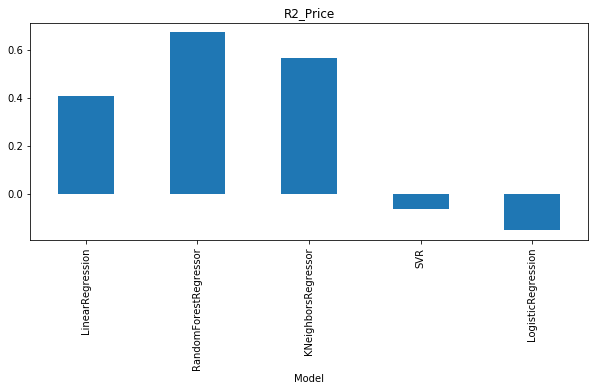

In [17]:
# model = RandomForestRegressor(n_estimators=150, max_features='sqrt', n_jobs=-1)  # случайный лес
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6),
          SVR(kernel='linear'),
          LogisticRegression()
          ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(Xtrn, Ytrn)
    # predict prices for test dataset and calculate r^2
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    # write obtained data
    TestModels = TestModels.append([tmp])

TestModels.set_index('Model', inplace=True)



In [ ]:
fig, axes = plt.subplots(ncols=1, figsize=(15, 6))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()